# The perceptron algorithm

We will now code the perceptron algorithm to solve scratch from a simple problem. Given the position in space (x,y) we have to predict the class of the data points.

Please complete the code in the where you find the "# complete here" comment.

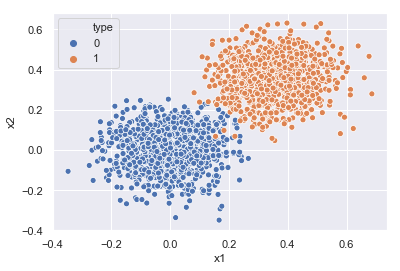

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix

# initiating random number
np.random.seed(11)

#### Creating the dataset

# mean and standard deviation for the x belonging to the first class
mu_x1, sigma_x1 = 0, 0.1 

# constat to make the second distribution different from the first
x2_mu_diff = 0.35

# creating the first distribution
d1 = pd.DataFrame({'x1': np.random.normal(mu_x1, sigma_x1 , 1000),
                   'x2': np.random.normal(mu_x1, sigma_x1 , 1000),
                   'type': 0})

# creating the second distribution
d2 = pd.DataFrame({'x1': np.random.normal(mu_x1, sigma_x1 , 1000) + x2_mu_diff,
                   'x2': np.random.normal(mu_x1, sigma_x1 , 1000) + x2_mu_diff,
                   'type': 1})

data = pd.concat([d1, d2], ignore_index=True)


ax = sns.scatterplot(x="x1", y="x2", hue="type",
                      data=data)


In [3]:
class Perceptron(object):
    """
    Simple implementation of the perceptron algorithm
    """

    def __init__(self, w0=1, w1=0.1, w2=0.1):

        # weights
        self.w0 = w0  # bias
        self.w1 = w1
        self.w2 = w2

    def step_function(self, z):
        if z >= 0:
            return 1
        else:
            return 0

    def weighted_sum_inputs(self, x1, x2):
        return sum([1 * self.w0, x1 * self.w1, x2 * self.w2])

    def predict(self, x1, x2):
        """
        Uses the step function to determine the output
        """
        z = self.weighted_sum_inputs(x1, x2)

        return self.step_function(z)

    def predict_boundary(self, x):
        """
        Used to predict the boundaries of our classifier
        """
        return -(self.w1 * x + self.w0) / self.w2

    def fit(self, X, y, epochs=1, step=0.1, verbose=True):
        """
        Train the model given the dataset
        """
        errors = []

        for epoch in range(epochs):
            error = 0
            for i in range(0, len(X.index)):
                x1, x2, target = X.values[i][0], X.values[i][1], y.values[i]
                # The update is proportional to the step size and the error
                update = step * (target - self.predict(x1, x2))
                self.w1 += update * x1
                self.w2 += update * x2
                self.w0 += update
                error += int(update != 0.0)
            errors.append(error)
            if verbose:
                print('Epochs: {} - Error: {} - Errors from all epochs: {}'\
                      .format(epoch, error, errors))


In [4]:
# Splitting the dataset in training and test set
msk = np.random.rand(len(data)) < 0.8

# Roughly 80% of data will go in the training set
train_x, train_y = data[['x1','x2']][msk], data.type[msk]
# Everything else will go into the validation set
test_x, test_y = data[['x1','x2']][~msk], data.type[~msk]


In [5]:
my_perceptron = Perceptron(0.1,0.1)

my_perceptron.fit(train_x, train_y, epochs=1, step=0.005)

pred_y = test_x.apply(lambda x: my_perceptron.predict(x.x1, x.x2), axis=1)

cm = confusion_matrix(test_y, pred_y, labels=[0, 1])

print(pd.DataFrame(cm,
                   index=['True 0', 'True 1'], 
                   columns=['Predicted 0', 'Predicted 1']))

Epochs: 0 - Error: 33 - Errors from all epochs: [33]
        Predicted 0  Predicted 1
True 0          201            5
True 1            0          176


In [6]:
my_perceptron.w0, my_perceptron.w1, my_perceptron.w2

(-0.025000000000000015, 0.09623421555805478, 0.09472342868828437)

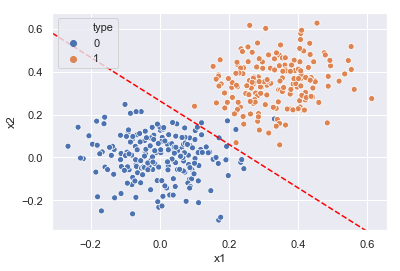

In [7]:
# Adds decision boundary line to the scatterplot

ax = sns.scatterplot(x="x1", y="x2", hue="type",
                      data=data[~msk])
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = my_perceptron.predict_boundary(x_vals)
ax.plot(x_vals, y_vals, '--', c="red")

# The perceptron algorithm using Keras

We will now code the perceptron algorithm using Keras on the same problem.

Please complete the code in the where you find the "# complete here" commnet.

In [8]:
import numpy as np
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense
import keras.backend as K
import tensorflow as tf

    
network = Sequential()
network.add(Dense(1, input_dim = 2))
network.compile(loss = "mse", optimizer = SGD(lr = 0.01))
network.fit(train_x, train_y , nb_epoch = 1, batch_size = 1, shuffle = False)



Instructions for updating:
Use tf.cast instead.
Epoch 1/1
   1/1618 [..............................] - ETA: 2:29 - loss: 0.0117

/Users/leonardodemarchi/venv3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if sys.path[0] == '':


1618/1618 [==============================] - 1s 733us/step - loss: 0.0126


In [9]:
network.get_weights()

pred_y = network.predict(test_x)


from sklearn.metrics import roc_auc_score

roc_auc_score(test_y, pred_y)

0.9987036628420124

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from sklearn.metrics import mean_squared_error

my_perceptron = Sequential()

input_layer = Dense(1, input_dim=2, activation="sigmoid", kernel_initializer="zero")
my_perceptron.add(input_layer)

my_perceptron.compile(loss="mse", optimizer=SGD(lr=0.01))

my_perceptron.fit(train_x.values, train_y, epochs=30, batch_size=1, shuffle=True)
pred_y = my_perceptron.predict(test_x)

print('MSE on the test set:', mean_squared_error(pred_y, test_y))

Epoch 1/30
1618/1618 [==============================] - 1s 714us/step - loss: 0.2227
Epoch 2/30
1618/1618 [==============================] - 1s 721us/step - loss: 0.1793
Epoch 3/30
1618/1618 [==============================] - 1s 775us/step - loss: 0.1480
Epoch 4/30
1618/1618 [==============================] - 1s 665us/step - loss: 0.1254
Epoch 5/30
1618/1618 [==============================] - 1s 686us/step - loss: 0.1087
Epoch 6/30
1618/1618 [==============================] - 1s 707us/step - loss: 0.0960
Epoch 7/30
1618/1618 [==============================] - 1s 649us/step - loss: 0.0861
Epoch 8/30
1618/1618 [==============================] - 1s 655us/step - loss: 0.0781
Epoch 9/30
1618/1618 [==============================] - 1s 613us/step - loss: 0.0717
Epoch 10/30
1618/1618 [==============================] - 1s 622us/step - loss: 0.0664
Epoch 11/30
1618/1618 [==============================] - 1s 634us/step - loss: 0.0619
Epoch 12/30
1618/1618 [==============================] - 1s 724